# Imports and Functions

In [ ]:
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [ ]:
def null_hypothesis_accepted(Z, z):
    if Z > z: # reject H0
        print('H0 rejected', 'Z =', Z, '/ ', 'z =', z)
        return False
    else:
        print('H0 accepted', 'Z =', Z, '/ ', 'z =', z)
        return True

def Z_score(mu0, sigma0, n, x_bar):
    return abs((x_bar - mu0) / (sigma0 / np.sqrt(n - 1)))

# Serie 11

## Aufgabe 5

TODO: change to students-t

In [ ]:
# H0: mu0 = 500g
# H1: mu0 != 500g
data = [495, 502, 505, 498, 490, 500]
x_bar = np.mean(data)
x_bar

In [ ]:
# standard_error can't be calculated, population std missing???
st.norm.ppf(0.95, loc=500, scale=np.std(data))

In [ ]:
Z = Z_score(500, np.std(data), len(data), np.mean(data))
Z

In [ ]:
a = 0.05
prop = 1 - (2 * a) # two-sided test
z = st.norm.ppf(prop)
z

In [ ]:
null_hypothesis_accepted(Z, z)

# Serie 14

## Aufgabe 79

In [ ]:
drive_shaft_1 = st.norm.rvs(loc=280, scale=20, size=1000)
drive_shaft_2 = st.norm.rvs(loc=292, scale=25, size=1000)
sns.displot([drive_shaft_1, drive_shaft_2])

In [ ]:
# Stichprobe mit n = 25
N = 25

drive_shaft_sample_1 = st.norm.rvs(loc=280, scale=math.sqrt(20), size=25)
drive_shaft_sample_2 = st.norm.rvs(loc=292, scale=math.sqrt(25), size=25)

In [ ]:
pd.DataFrame(drive_shaft_sample_1).describe()

pd.DataFrame(drive_shaft_sample_2).describe()

In [ ]:
mu_s1 = np.mean(drive_shaft_sample_1)
print(mu_s1)
mu_s2 = np.mean(drive_shaft_sample_2)
print(mu_s2)

In [ ]:
st.norm.pdf(0)

H0: mu = 280 MPa
H1: mu != 280 MPa

### a) Bestimmmen sie die Grenze c bei gegebener Irrtumswahrscheinlichkeit α = 0.05.
Wie groß ist in diesem Fall die Irrtumswahrscheinlichkeit 2. Art, β?

PPF:
Density functions return the probability of an observation in the distribution. Recall the definitions of the PDF and CDF as follows:

Probability Density Function (PDF): Returns the probability for an observation having a specific value from the distribution.
Cumulative Density Function (CDF): Returns the probability for an observation equal to or lesser than a specific value from the distribution.
In order to calculate a critical value, we require a function that, given a probability (or significance), will return the observation value from the distribution.

Specifically, we require the inverse of the cumulative density function, where given a probability, we are **given the observation value that is less than or equal to the probability**.
--> This is called the percent point function (PPF), or more generally the quantile function.

In [216]:
# critical value c so that there is only a 5% chance of rejecting H0 even if it is true
critical_value_c = st.norm.ppf(0.95, loc=280, scale=20/np.sqrt(25)) # based on one-sided test and alpha of 0.05
print(critical_value_c, 'MPa')

286.5794145078059 MPa


In [217]:
# Error Type 2 - how high is probability (cdf) that we falsely accept H0 and the part is actually from the other distribution
error_type_2_prob = st.norm.cdf(critical_value_c, loc=292, scale=25/np.sqrt(25))
print((error_type_2_prob * 100).round(2), '%')

13.92 %


### b) die Grenze c bei gegebener Irrtumswahrscheinlichkeit β = 0.2.
Wie groß ist in diesem Fall die Irrtumswahrscheinlichkeit 1. Art, α?

In [218]:
# choose critical value so that probability of β error becomes 0.2
critical_value_c = st.norm.ppf(0.2, loc=292, scale=25/np.sqrt(25))
print(critical_value_c, 'MPa')

287.79189383213543 MPa


In [219]:
# calculate α when critical value based on β error 0.2
error_type_1_prob = 1 - st.norm.cdf(critical_value_c, loc=280, scale=20/np.sqrt(25))
print((error_type_1_prob * 100).round(2), '%')

2.57 %


#### c) die Grenze c, falls beide Irrtumswahrscheinlichkeiten gleich groß sein sollen, d.h. α = β?

In [221]:
critical_value_list = np.arange(280, 290, 0.001)

# c_critical_value so that
def prob_type1_error(c):
    return 1 - st.norm.cdf(c, loc=280, scale=20/np.sqrt(25))

# equals
def prob_type2_error(c):
    return st.norm.cdf(c, loc=292, scale=25/np.sqrt(25))

prob_type1_error_list = [prob_type1_error(c) for c in critical_value_list]
prob_type2_error_list = [prob_type2_error(c) for c in critical_value_list]

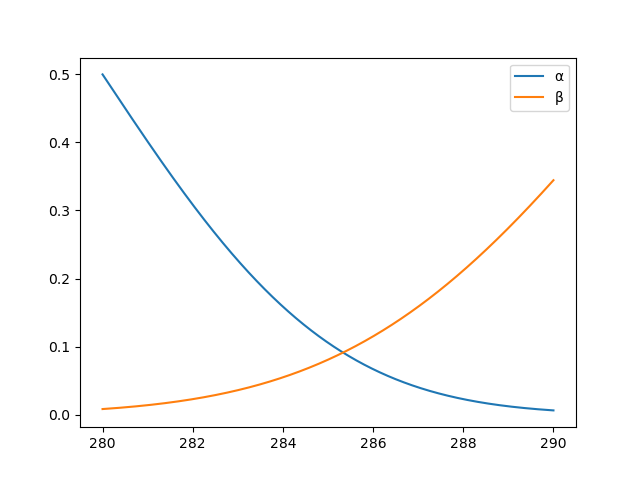

In [222]:
%matplotlib widget
plt.plot(critical_value_list, prob_type1_error_list, label = 'α')
plt.plot(critical_value_list, prob_type2_error_list, label = 'β')
plt.legend()
plt.show()

**Result**: Alpha and Beta errors are equal around when c = 285.33 MPa

### d) Wie groß müsste man den Stichprobenumfang n wählen, damit beide Irrtumswahrscheinlichkeiten gleich groß sind und höchstens gleich 0.02 sind?

In [ ]:
# 4x sample size for 2x reduction in probability of error

# wo muss n = 25 berücksichtigt werden???

## Aufgabe 80

In [225]:
sample = [33, 31, 30, 29, 24, 27, 28, 31, 25, 23]

In [226]:
pd.DataFrame(sample).describe()

,0
count,10.000000
mean,28.100000
std,3.314949
min,23.000000
25%,25.500000
50%,28.500000
75%,30.750000
max,33.000000


In [227]:
Z = (np.mean(sample) - 27) / (2 / math.sqrt(10)) # Z score
Z

1.7392527130926108

In [228]:
z = 1.96 # z critical value (0.975 in z-table based on a = 0.05 and two-sided testing)
z

1.96

In [229]:
# With Z-Test:
# if Z score > z critical value: Reject H0
Z > z

False

Mit einem 5% Signifikanzniveau gibt es statistische Evidenz dafür, dass die durchschnittliche Kerbschlagsarbeit 27 J ist. **H0 wird akzeptiert**.

In [230]:
# With T-Test:
t = 2.62 # t critical value (t-table based on a = 0.05 two tailed with dof 10 - 1 = 9)
t

2.62

In [231]:
Z > t
# lösung in buch: 1.74

False

Hypothese H0 wird auch mit dem T-Test (# of samples < 30) akzeptiert

## Aufgabe 81

In [ ]:
# population: mü = 100 kg and std = 1.5 kg
# sample with 225 bags: x_bar = 99.75 kg
# H0: mü0 = 100 kg
# H1: mü0 != 100 kg
# alpha = 0.02

In [ ]:
# calc the standardized statistic value
standard_error = 1.5 / np.sqrt(225 - 1) # for sample, so dof = 1
Z = abs((99.75 - 100) / standard_error)
print('Z-score:', Z)

In [ ]:
a = 0.02
prop = 1 - (a * 2)
z = st.norm.ppf(prop) # two-sided test
print('z-value [critical value]:', z)

In [ ]:
# check test result
if Z > z: # reject H0
    print('H0 rejected', 'Z =', Z, '/ ', 'z =', z)
else:
    print('H0 accepted', 'Z =', Z, '/ ', 'z =', z)

at 2% significance level statistical evidence that mean weight is NOT 100 kg.

## Aufgabe 82

In [ ]:
# H0: μ0 >= 12000 km
# H1: μ0 < 12000 km
# σ0 = 850
# Sample: n = 100 α = 0.03

In [ ]:
standard_error = 850 / np.sqrt(100 - 1) # of sample with dof = 1

In [ ]:
# using standard error
st.norm.ppf(0.03, loc=12000, scale=standard_error)

Der Erwartungswert der Laufleistung muss den Wert von 11'839 km unterschreiten!

In [ ]:
# what's the meaning of this in that context???
# using population standard deviation
st.norm.ppf(0.03, loc=12000, scale=850)

## Aufgabe 83

In [ ]:
# Exhaust max. 250 mg NOx / km
# σ0 = 34 mg
# Sample: n = 100 and x_bar = 255 mg / km

# H0: μ0 <= 250 mg
# H1: μ0 > 250 mg

#### a) Kann die Vermutung der Behörde mit einer Irrtumswahrscheinlichkeit von α = 0.05 bestätigt werden?

In [ ]:
standard_error = 34 / np.sqrt(10 - 1)
standard_error

In [ ]:
Z = (255 - 250) / standard_error # standardized Z-score
Z

In [ ]:
a = 0.05
prop = 1 - 0.05 # assuming one-sided test to the right
z = st.norm.ppf(prop)
z

In [ ]:
# Check result
null_hypothesis_accepted(Z, z)

Null hypothesis accepted - no statistical evidence at alpha of 0.05 that exhaust too high

#### b) Wie viele Fahrzeuge müssten getestet werden, um bei gleichbleibendem Mittelwert und Standardabweichung die Vermutung der Behörde mit einer Irrtumswahrscheinlichkeit von α = 0.05 bestätigen zu können?

Z müsste grösser als z (1.6448536269514722) werden

In [ ]:
sample_sizes = np.arange(10, 1000, 1)

Z_scores = [Z_score(mu0=250, sigma0=34, n=size, x_bar=255) for size in sample_sizes]

plt.clf()
plt.plot(Z_scores, sample_sizes)
plt.xlabel('Z score')
plt.ylabel('sample size')
plt.grid(alpha=.4,linestyle='--')
plt.show()

In [ ]:
df = pd.DataFrame(Z_scores)
first_index_Z_bigger_than_z = df.index[df[0] > 1.6448536269514722].tolist()[0]
print('sample size for H0 to get rejected:', sample_sizes[first_index_Z_bigger_than_z])

## other random stuff

In [ ]:
c = st.norm.interval(0.90, loc=280, scale=np.sqrt(20)) # if this would be two-sided...

In [ ]:
Z_score = ( - 280)
st.norm.cdf(0.9999)

z_value = 1 - 0.05
print(z_value)

In [ ]:
Z_score = (mu_s1 - mu_s2) / (np.std(drive_shaft_sample_1) / math.sqrt(N))
Z_score

In [ ]:
# drive shafts 1
st.norm.interval(0.05, loc=280, scale=math.sqrt(20)/math.sqrt(N))

In [ ]:
# drive shafts 2
st.norm.interval(0.05, loc=292, scale=math.sqrt(25)/math.sqrt(N))